In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)

In [ ]:
#The goal of this project is to build a machine learning model that predicts whether an employee earns more than $50K or not, based on features like age, education, occupation, hours per week, and experience. The solution helps HR teams automate and streamline high-income employee identification.

In [6]:
data = pd.read_csv("C:\\ibm internship\\employeedata.csv")
print(data.info())
print(data['income'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [16]:
data

,age,education,occupation,hours-per-week,educational-num,income
0,25,1,6,40,7,0
1,38,11,4,50,9,0
2,28,7,10,40,12,1
3,44,15,6,40,10,1
5,34,0,7,30,6,0
...,...,...,...,...,...,...
48837,27,7,12,38,12,0
48838,40,11,6,40,9,1
48839,58,11,0,40,9,0
48840,22,11,0,20,9,0


In [17]:
data.shape

(45222, 6)

In [7]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [8]:
# Replace missing and ambiguous values
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)


In [9]:
# Select main features for modeling
features = ['age', 'education', 'occupation', 'hours-per-week', 'educational-num']
data = data[features + ['income']]


In [10]:
label_encoders = {}
for col in ['education', 'occupation']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [11]:
data['income'] = data['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)


In [12]:
#Train-Test Split
X = data.drop('income', axis=1)
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)



(36177, 5) (9045, 5)


In [13]:
#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
#model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

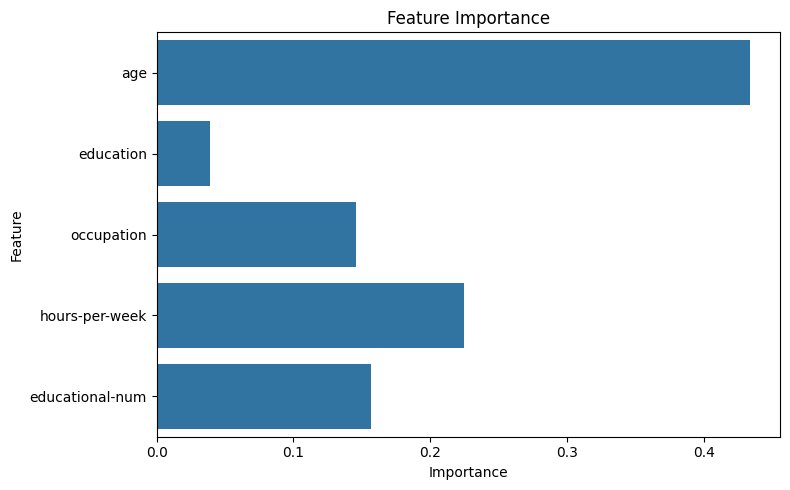

In [ ]:
#feature importance plot
plt.figure(figsize=(8, 5))
importances = model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

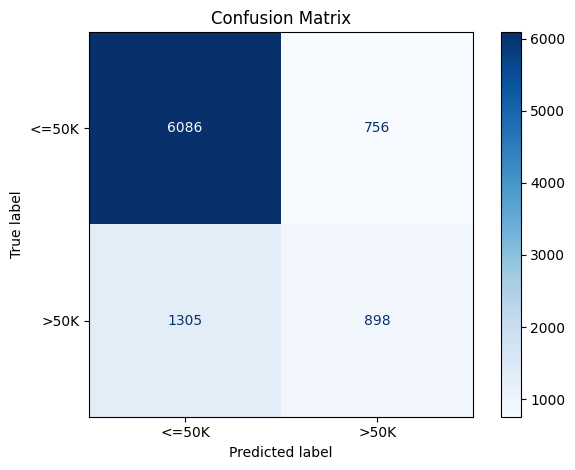

In [80]:
#confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [81]:
#prediction
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7721393034825871
Confusion Matrix:
 [[6086  756]
 [1305  898]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      6842
           1       0.54      0.41      0.47      2203

    accuracy                           0.77      9045
   macro avg       0.68      0.65      0.66      9045
weighted avg       0.76      0.77      0.76      9045



In [15]:
# Example: 35 years old, Bachelors, Exec-managerial, 45 hours/week, 13 years education
sample_employee = pd.DataFrame({
    'age': [35],
    'education': [label_encoders['education'].transform(['Bachelors'])[0]],
    'occupation': [label_encoders['occupation'].transform(['Exec-managerial'])[0]],
    'hours-per-week': [45],
    'educational-num': [13]
})
sample_employee_scaled = scaler.transform(sample_employee)
prediction = model.predict(sample_employee_scaled)
result = '<50K' if prediction[0] == 1 else '>=50K'
print(f"Predicted income: {result}")


Predicted income: >=50K
